# 0.1-100µM Ag 


In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-15);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%available_graphics_toolkits()
%loaded_graphics_toolkits

In [2]:
%0.1µM 

AgT=1e-6; pH=7; pe=20.75-pH; logClT=-6:0.02:-1; ClT=10.^logClT;

In [3]:
% MODEL USING PHREEQC

for i=1:length(ClT);

minerals=[{'AgCls'};]; totalvector=[AgT; ClT(i); ClT(i)]; totalnames=[{'Ag'}; {'Cl'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Cl-'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'}];
acid=['NaOH']; show=0; T=25;
database=['complexAgCls.dat']; 

tic;
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

Ag(i)=solutionspeciesconcs(1); 
Cl(i)=solutionspeciesconcs(2); 
AgCl(i)=solutionspeciesconcs(3); 
AgCl2(i)=solutionspeciesconcs(4);
AgCl3(i)=solutionspeciesconcs(5);
AgCl4(i)=solutionspeciesconcs(6);
AgCls(i)=solidconcs(1);

end

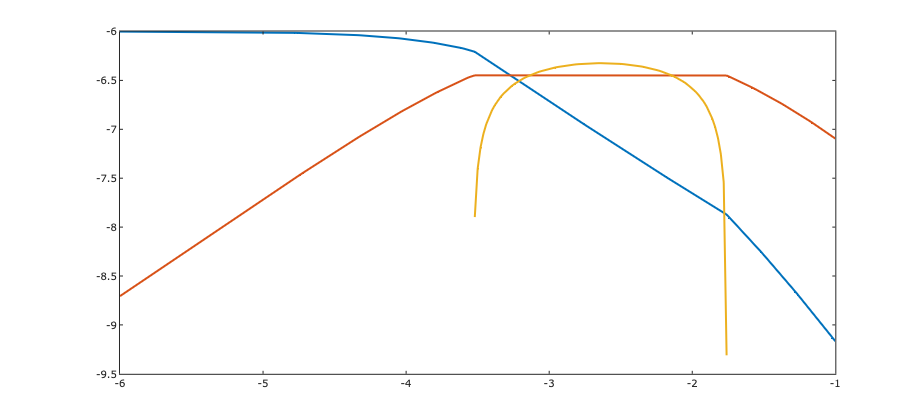

ERROR: received unknown message
Message type: usage_request
ERROR: received unknown message
Message type: usage_request


In [4]:
%h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCl),log10(ClT),log10(AgCls));
%h=plot((ClT),log10(Ag));
set(h,'linewidth',2);
%set(gca,'linewidth',2,'fontsize',12);
%xlabel('logClT'); ylabel('log[species]');
%xlabel('logCl'); ylabel('logAg');
%legend('Ag','AgCls','AgCl','AgCl2','AgCl3','AgCl4','location','eastoutside')
%axis([-12 0 -40 -1])
%exportforplot=[...
%log10(Ag)' log10(Cl)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]

%end